<a href="https://colab.research.google.com/github/jpabonl/Mecanica_cuantica_I/blob/main/TareaM_C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Grafica de la densidad de energia por unidad de frecuencia como funcion de la longitud de onda**

---






In [ ]:
# Definimos las constantes que utilizaremos a lo largo del código, estas son: Cte de PLanck, velocidad de la luz y cte de Boltzman.
# Además, graficaremos a T cte, y usamos los valores pedidos por la guía.
h= 6.626e-34
c=3e8
kB=1.381e-23
T=[10000, 8000, 5000, 3000]
# Utilizamos la ecuacion de densidad de energia con nuestras constrantes ya definidas
#De paso, usamos np.argmax() para hallar el punto maximo y lo coordinamos para x y para y.
def grafica_densidad_energia(T, l_min=1e-9, l_max=3e-6, n_points=1000):
    l_o= np.linspace(l_min, l_max, n_points)
    u= (8 * np.pi * h ) / (l_o**3) * (1 / (np.exp((h * c) / (l_o * kB * T)) - 1))
    encontrar_pico = np.argmax(u)
    max_longitud = l_o[encontrar_pico]
    max_densidad = u[encontrar_pico]

    return u, l_o, max_longitud, max_densidad

<ipython-input-47-dcf32d59b5c3>:11: RuntimeWarning: overflow encountered in exp
  u= (8 * np.pi * h ) / (l_o**3) * (1 / (np.exp((h * c) / (l_o * kB * T)) - 1))


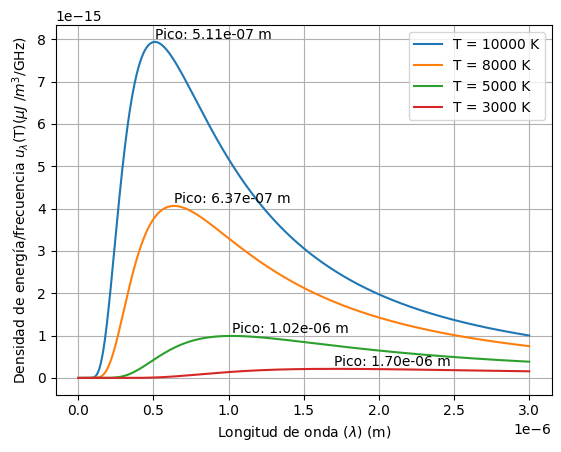

In [ ]:
#Ahora, es momento de graficar la funcion de densidad, la cual llamamos para nuestra lista de T's fijas, marcando las longitudes máximas en el pmismo plot
plt.figure()
for temp in T:
    u, l_o, max_longitud, max_densidad = grafica_densidad_energia(temp)
    plt.plot(l_o, u, label=f'T = {temp} K')
    plt.text(max_longitud, max_densidad, f'Pico: {max_longitud:.2e} m',
             fontsize=10, ha='left', va='bottom')
plt.legend()
plt.xlabel("Longitud de onda ($\lambda$) (m)")
plt.ylabel("Densidad de energía/frecuencia $u_{\lambda}$(T)($\mu J$ /$m^{3}$/GHz)")
plt.grid()
plt.show()

# **Longitud de onda en los picos de las curvas**


*   T=10000K, Espectro visible (Verde, 511nm)
*   T=8000k, Espectro visible (Naranja, 637nm)
*   T=5000K, infrarrojo cercano (1020nm)
*   T=3000k, infrarrojo cercano (1700nm)





# **Grafica de la densidad de energia como función de la frecuencia y curva de Rayleigh-Jeans**

---


In [ ]:
#Usamos la ecuacion de Planck y la definifmos en un rango de frecuencias, con 500 puntos en su dominio
def grafica_u_freq(l_min=100e-9, l_max=3000e-9, n_points=500):
    l_o= np.linspace(l_min, l_max, n_points)
    freq= c/l_o
    u= (8 * np.pi * h * freq**3) / (c**3) * (1 / (np.exp((h * freq) / (kB * 10000)) - 1))
    return u, freq
#Definimos ahora la funcion de Rayleigh-Jeans para hacer la comparación debida
def rayleigh_Jeans(l_min=100e-9, l_max=3000e-9, n_points=500):
    l_o= np.linspace(l_min, l_max, n_points)
    freq= c/l_o
    rg_u=(8 * np.pi * freq**2 * (kB * 10000)) / (c**3)
    return rg_u, freq

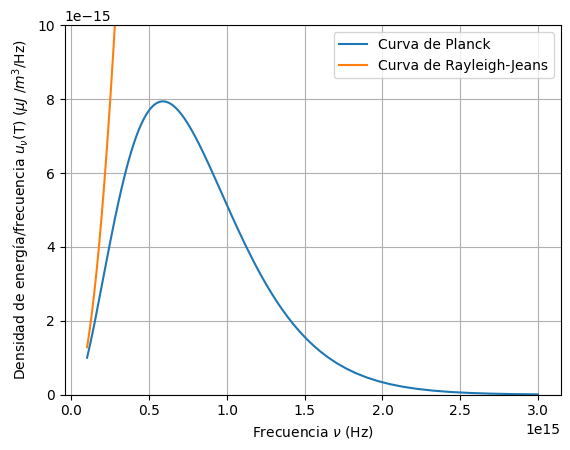

In [ ]:
#Graficamos ambas curvas para evidenciar el punto en el que diverge, lo llamado catastrofe ultravioleta
u , freq= grafica_u_freq()
rg_u, freq = rayleigh_Jeans()
plt.figure()
plt.ylim(0,10e-15)
plt.plot(freq, u, label="Curva de Planck")
plt.plot(freq, rg_u, label="Curva de Rayleigh-Jeans")
plt.legend()
plt.xlabel("Frecuencia $\\nu$ (Hz)")
plt.ylabel("Densidad de energía/frecuencia $u_{\\nu}$(T) ($\\mu J$ /$m^{3}$/Hz)")
plt.grid()
plt.show()

# *Grafica de la densidad de energia como función de la frecuencia de Wien*

---


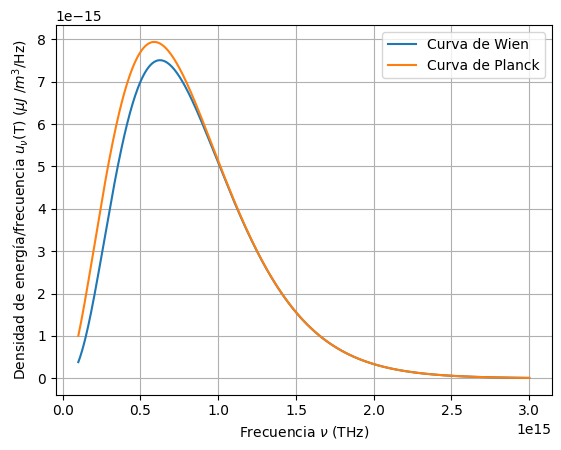

In [ ]:
#Definimos ahora la funcion de Wien
def densidad_wien(freq_min= 100e12, freq_max=3000e12, n_points=500):
  freq=np.linspace(freq_min,freq_max,n_points)
  d_W=(8 * np.pi * h * freq**3) / (c**3) * np.exp(- (h * freq) / (kB * 10000))
  return d_W,freq
#Usamos la ecuacion de Planck y la definifmos en un rango de frecuencias diferente, con 500 puntos en su dominio, para tener un rango de comparacion significativo para Wien
def densidad_planck(freq_min= 100e12, freq_max=3000e12, n_points=500):
  freq=np.linspace(freq_min,freq_max,n_points)
  d_P=(8 * np.pi * h * freq**3) / (c**3) * 1 / (np.exp((h * freq) / (kB * 10000)) - 1)
  return d_P,freq
d_W ,freq= densidad_wien()
d_p,freq=densidad_planck()
#Graficamos ambas curvas para evidenciar el punto en el que diverge, y los puntos en los que coincide
plt.plot(freq, d_W, label="Curva de Wien")
plt.plot(freq, d_p, label="Curva de Planck")
plt.xlabel("Frecuencia $\\nu$ (THz)")
plt.ylabel("Densidad de energía/frecuencia $u_{\\nu}$(T) ($\\mu J$ /$m^{3}$/Hz)")
plt.legend()
plt.grid()
plt.show()


 Como podemos observar, para la primera gráfica, en la cual se compara curva de Planck con aproximación de Rayleigh-Jeans, la función es una buena aproximación a bajas frecuencias, pero esto se rompe aproximadamente desde 2.5*1014Hz. En contraposición a la segunda gráfica, donde podemos observar que la aproximación es inválida hasta 6*1014Hz, esto da a entender que antes de Planck y los datos experimentales, las aproximaciones estaban sesgadas bajo las búsquedas de la época e incluso existía un espacio significativo donde ninguna de las aproximaciones tocaba la curva de los datos medidos.